Задание 2. Обучение нейронной сети для классификации изображений, используя свой датасет

In [33]:
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os
import matplotlib
matplotlib.use("Agg")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

2.1 Загрузка данных и подготовка рабочих списков

In [22]:
data_path = '/content/drive/MyDrive/DeepLearning/Dataset/train/'

class_dirs = []

data = []
labels = []

for file in os.listdir(data_path):
  class_dirs.append(os.path.join(data_path, file))

for class_dir in class_dirs:
  for image in os.listdir(class_dir):
    image_path = os.path.join(class_dir, image)
    image_label = image_path.split(os.path.sep)[-2]
    
    image = cv2.imread(image_path)
    image = cv2.resize(image, (64, 64)).flatten()
    data.append(image)
    labels.append(image_label)

print(f'Загружено {len(data)} изображений и {len(labels)} меток')

with open('/content/drive/MyDrive/DeepLearning/pickle/64x64_images.pickle','wb') as f:
    pickle.dump(data, f)

with open('/content/drive/MyDrive/DeepLearning/pickle/64x64_labels.pickle','wb') as f:
    pickle.dump(labels, f)

Загружено 3049 изображений и 3049 меток


2.2 Нормализация данных

In [23]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

2.3 Разбивка на обучающую выборку и выборку валидации

In [24]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=2)

2.4 Стандартизация входных данных для повышения точности модели

In [25]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

2.5 Создание архитектуры нейронной сети

In [26]:
model = Sequential()
model.add(Dense(64, input_shape=(12288,), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(3, activation="softmax"))

2.6 Компиляция модели. Настройка параметров обучения

In [27]:
INIT_LR = 0.0001
EPOCHS = 50

opt = SGD(lr = INIT_LR)

model.compile(loss = "categorical_crossentropy", optimizer = opt,
	metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                786496    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 788,675
Trainable params: 788,675
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2.7 Обучение нейронной сети

In [28]:
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=64, verbose=False)

2.8 Оценка критерия качества работы нейронной сети с помощью представления на графике

In [29]:
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

24/24 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       apple       0.89      0.90      0.90       270
      banana       0.92      0.94      0.93       259
      orange       0.89      0.86      0.88       234

    accuracy                           0.90       763
   macro avg       0.90      0.90      0.90       763
weighted avg       0.90      0.90      0.90       763



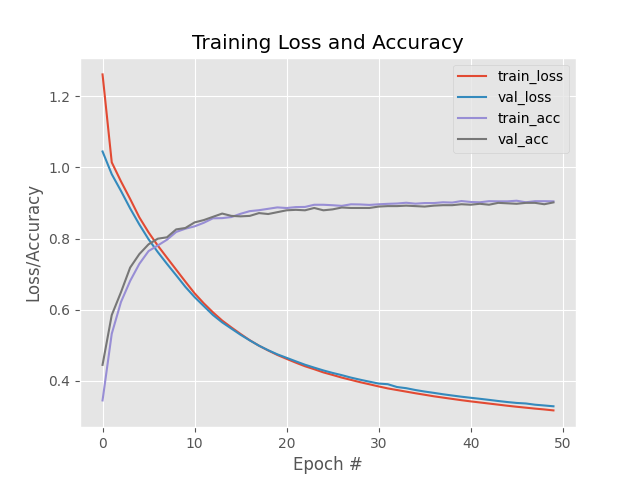

In [30]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()

plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")

plt.legend()
plt.savefig('plot.png')
cv2_imshow(cv2.imread("plot.png"))

2.9 Сохранение лейблов и модели на диск

In [31]:
model.save("/content/drive/MyDrive/DeepLearning/work2/NN_model.h5", save_format="h5")
f = open("/content/drive/MyDrive/DeepLearning/work2/label_bin", "wb")
f.write(pickle.dumps(lb))
f.close()

2.10 Проверка обученной модели пользовательскими данными

In [34]:
from keras.models import load_model
import argparse
import pickle
import cv2

from google.colab import files
from keras import models

In [36]:
val_images = sorted(list(paths.list_images("/content/drive/MyDrive/DeepLearning/Dataset/val/")))
model = models.load_model("/content/drive/MyDrive/DeepLearning/work2/NN_model.h5")
lb = pickle.loads(open("/content/drive/MyDrive/DeepLearning/work2/label_bin", "rb").read())

2.10 Предсказание классов на пользовательских изображениях

1/1 [==============================] - 0s 40ms/step
['apple' 'banana' 'orange']
[[0.1324852  0.44520396 0.42231083]]


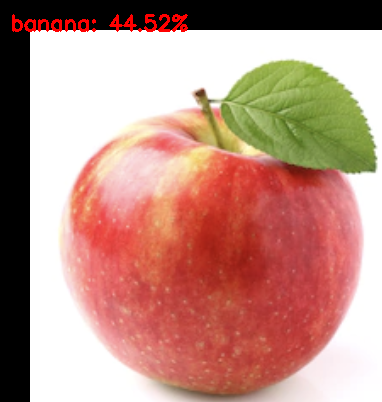

1/1 [==============================] - 0s 17ms/step
['apple' 'banana' 'orange']
[[0.28391856 0.1613614  0.55472   ]]


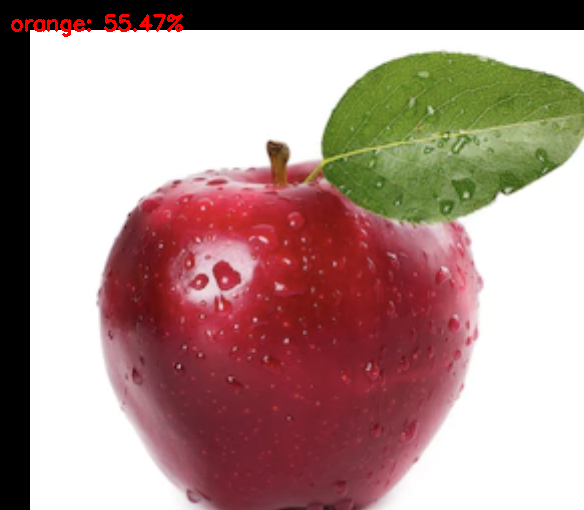

1/1 [==============================] - 0s 16ms/step
['apple' 'banana' 'orange']
[[0.13260937 0.16575354 0.70163715]]


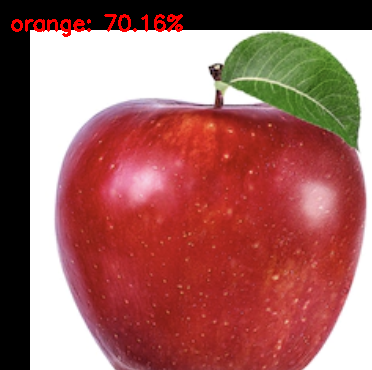

1/1 [==============================] - 0s 15ms/step
['apple' 'banana' 'orange']
[[0.02590381 0.8196758  0.15442035]]


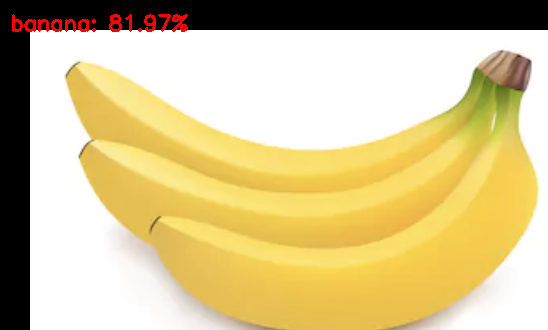

1/1 [==============================] - 0s 21ms/step
['apple' 'banana' 'orange']
[[0.11948632 0.8226159  0.0578977 ]]


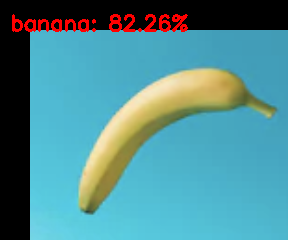

1/1 [==============================] - 0s 17ms/step
['apple' 'banana' 'orange']
[[0.02674028 0.79204273 0.18121698]]


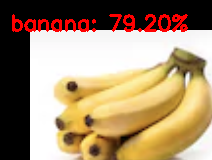

1/1 [==============================] - 0s 17ms/step
['apple' 'banana' 'orange']
[[0.01535497 0.18139504 0.80325   ]]


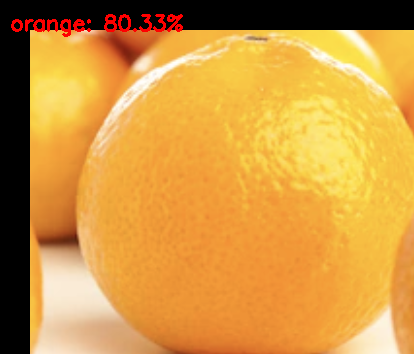

1/1 [==============================] - 0s 19ms/step
['apple' 'banana' 'orange']
[[0.03814474 0.7581008  0.20375451]]


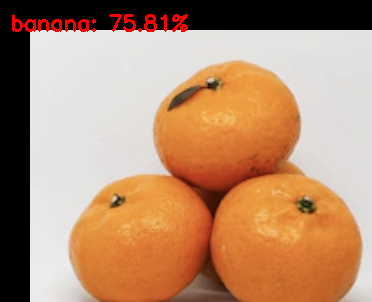

1/1 [==============================] - 0s 16ms/step
['apple' 'banana' 'orange']
[[0.159189   0.02713883 0.8136722 ]]


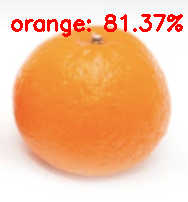

1/1 [==============================] - 0s 18ms/step
['apple' 'banana' 'orange']
[[0.13666679 0.7630895  0.10024375]]


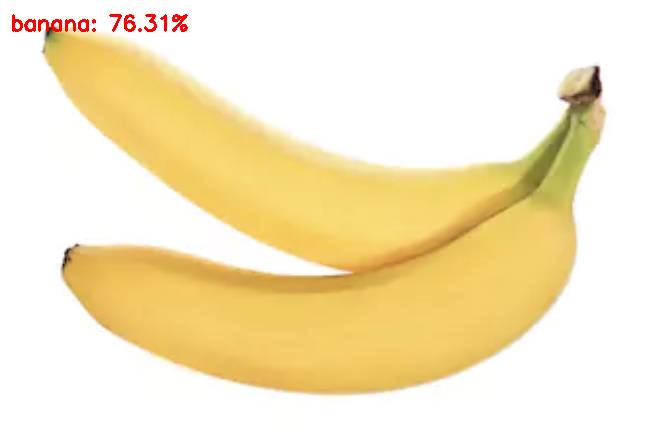

1/1 [==============================] - 0s 22ms/step
['apple' 'banana' 'orange']
[[0.0913546  0.8701322  0.03851326]]


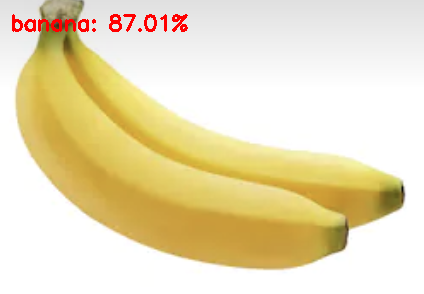

1/1 [==============================] - 0s 15ms/step
['apple' 'banana' 'orange']
[[0.19884011 0.74306834 0.05809151]]


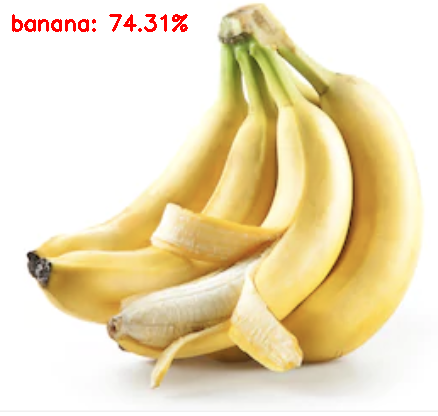

1/1 [==============================] - 0s 16ms/step
['apple' 'banana' 'orange']
[[0.09434681 0.0714034  0.8342498 ]]


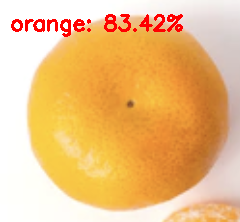

1/1 [==============================] - 0s 18ms/step
['apple' 'banana' 'orange']
[[0.10662737 0.02391423 0.86945844]]


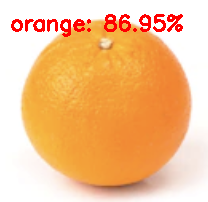

In [37]:
for img in val_images:

  image = cv2.imread(img)
  output = image.copy()

  image = cv2.resize(image, (64, 64))
  image = image.flatten()

  # масштабируем значения пикселей к диапазону [0, 1]
  image = image.astype("float") / 255.0
  image = image.reshape((1, image.shape[0]))

  # делаем предсказание на изображении
  preds = model.predict(image)
  print(lb.classes_)
  print(preds)

  # находим индекс метки класса с наибольшей вероятностью
  # соответствия
  i = preds.argmax(axis=1)[0]
  label = lb.classes_[i]

  # Добавляем на исходное изображение метку класса и вероятность прогноза
  text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
  cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0, 0, 255), 2)

  # показываем выходное изображение
  cv2_imshow(output)